In [1]:
import pandas as pd
import numpy as np
import csv
from math import floor
from matplotlib import pyplot as plt
import matplotlib
from li_s_battery_init import inputs
from li_s_battery_init import cathode as cat
from li_s_battery_init import anode as an
from li_s_battery_post import tag_strings
import os
import sys
owd = os.getcwd()


Density for cascade
Inputs check
[0.01316262]
[2.40602374 2.35491753 2.2549728  2.053679   2.02343709]
A_S = 8135.852589318088
A_L = 77.16624578489818
A_C = 15893.49058244852
Elyte/sulfur ratio  3.9535945042195153
Porosity = 0.653202561603244
solid sulfur = 0.019
External current = -3.280517581242112
Initialization check


In [2]:
# Function definitions
def get_file_name(find_string, dir_path, **kwargs):
    flag = kwargs.get('flag', None)
    full_list = os.listdir(dir_path)
    if flag:
        file_name = [file for file in full_list if find_string in file]
    else:
        file_name = [file for file in full_list if find_string in file][0]
        
    return file_name

def df_name(file_name_list, file_number):
    file_name = file_name_list[file_number]
    df_name = file_name.split('_')
    return df_name[0]

def read_file(file_name_list):
    df_dict = {}
    for i in np.arange(0, len(file_name_list)):
        name = df_name(file_name_list, i)
        df_dict[name] = pd.read_csv(file_name_list[i])
    return df_dict

def sort_df(SV):
    Vcell = {}
    Capacity = {}
    C_k = {}
    C_Lip = {}
    keys = list(SV.keys())
    tags = tag_strings(SV['dch0.1C'])
    keys_Lip = np.array([])
    for i in np.arange(0, len(SV.keys())):
        offset = i*9
        Crate = keys[i]
        Vcell[Crate] = SV[Crate]['Phi_ed1']
        Capacity[Crate] = SV[Crate]['Time']
        C_k[Crate] = SV[Crate][tags['rho_el']]
        for key in SV[Crate]:
            if key.startswith('rho_Li+(e)'):
                keys_Lip = np.append(keys_Lip, key)        
        C_Lip[Crate] = SV[Crate][keys_Lip]
    return Vcell, Capacity, C_k, C_Lip

In [3]:
os.chdir(owd)
Lithiated_85pct_25um_files = get_file_name('.csv', 'Lithiated Data/100 um cathode 85% porosity', flag=1)
Lithiated_85pct_20um_files = get_file_name('.csv', 'Lithiated Data/100 um cathode 85% porosity 20 um sep', flag=1)
Lithiated_85pct_15um_files = get_file_name('.csv', 'Lithiated Data/100 um cathode 85% porosity 15 um sep', flag=1)
Lithiated_85pct_10um_files = get_file_name('.csv', 'Lithiated Data/100 um cathode 85% porosity 10 um sep', flag=1)

Lithiated_65pct_25um_files = get_file_name('.csv', 'Lithiated Data/100 um cathode 65% porosity', flag=1)
Lithiated_65pct_20um_files = get_file_name('.csv', 'Lithiated Data/100 um cathode 65% porosity 20 um sep', flag=1)
Lithiated_65pct_15um_files = get_file_name('.csv', 'Lithiated Data/100 um cathode 65% porosity 15 um sep', flag=1)
Lithiated_65pct_10um_files = get_file_name('.csv', 'Lithiated Data/100 um cathode 65% porosity 10 um sep', flag=1)

Lithiated_45pct_25um_files = get_file_name('.csv', 'Lithiated Data/100 um cathode 45% porosity', flag=1)
Lithiated_45pct_20um_files = get_file_name('.csv', 'Lithiated Data/100 um cathode 45% porosity 20 um sep', flag=1)
Lithiated_45pct_15um_files = get_file_name('.csv', 'Lithiated Data/100 um cathode 45% porosity 15 um sep', flag=1)
Lithiated_45pct_10um_files = get_file_name('.csv', 'Lithiated Data/100 um cathode 45% porosity 10 um sep', flag=1)

cascade_85pct_25um_files = get_file_name('.csv', 'Cascade Data/100 um cathode 85% porosity', flag=1)
cascade_65pct_25um_files = get_file_name('.csv', 'Cascade Data/100 um cathode 65% porosity', flag=1)
cascade_45pct_25um_files = get_file_name('.csv', 'Cascade Data/100 um cathode 45% porosity', flag=1)

kuzmina_85pct_25um_files = get_file_name('.csv', 'Kuzmina Data/100 um cathode 85% porosity', flag=1)
kuzmina_65pct_25um_files = get_file_name('.csv', 'Kuzmina Data/100 um cathode 65% porosity', flag=1)
kuzmina_45pct_25um_files = get_file_name('.csv', 'Kuzmina Data/100 um cathode 45% porosity', flag=1)

assary_85pct_25um_files = get_file_name('.csv', 'Assary Data/100 um cathode 85% porosity', flag=1)
assary_65pct_25um_files = get_file_name('.csv', 'Assary Data/100 um cathode 65% porosity', flag=1)
assary_45pct_25um_files = get_file_name('.csv', 'Assary Data/100 um cathode 45% porosity', flag=1)

bessler_85pct_25um_files = get_file_name('.csv', 'Bessler Data/100 um cathode 85% porosity 25 um sep', flag=1)
bessler_85pct_10um_files = get_file_name('.csv', 'Bessler Data/100 um cathode 85% porosity 10 um sep', flag=1)
bessler_ver_files = get_file_name('.csv', 'Bessler Data/Bessler microstructure', flag=1)

In [4]:
# Import lithiated cascade files with 100 um cat, 25um sep, and 85% porosity cat
os.chdir(owd)
os.chdir('Lithiated Data/100 um cathode 85% porosity')
lithiated_85pct25um = read_file(Lithiated_85pct_25um_files)
os.chdir(owd)

# Import lithiated cascade files with 100 um cat, 20um sep, and 85% porosity cat
os.chdir(owd)
os.chdir('Lithiated Data/100 um cathode 85% porosity 20 um sep')
lithiated_85pct20um = read_file(Lithiated_85pct_20um_files)
os.chdir(owd)

# Import lithiated cascade files with 100 um cat, 15um sep, and 85% porosity cat
os.chdir(owd)
os.chdir('Lithiated Data/100 um cathode 85% porosity 15 um sep')
lithiated_85pct15um = read_file(Lithiated_85pct_15um_files)
os.chdir(owd)

# Import lithiated cascade files with 100 um cat, 10um sep, and 85% porosity cat
os.chdir(owd)
os.chdir('Lithiated Data/100 um cathode 85% porosity 10 um sep')
lithiated_85pct10um = read_file(Lithiated_85pct_10um_files)
os.chdir(owd)
#-------------------------------------------------------------------------------
# Import lithiated cascade files with 100 um cat, 25um sep, and 65% porosity cat
os.chdir(owd)
os.chdir('Lithiated Data/100 um cathode 65% porosity')
lithiated_65pct25um = read_file(Lithiated_65pct_25um_files)
os.chdir(owd)

# Import lithiated cascade files with 100 um cat, 20um sep, and 65% porosity cat
os.chdir(owd)
os.chdir('Lithiated Data/100 um cathode 65% porosity 20 um sep')
lithiated_65pct20um = read_file(Lithiated_65pct_20um_files)
os.chdir(owd)

# Import lithiated cascade files with 100 um cat, 25um sep, and 65% porosity cat
os.chdir(owd)
os.chdir('Lithiated Data/100 um cathode 65% porosity 15 um sep')
lithiated_65pct15um = read_file(Lithiated_65pct_15um_files)
os.chdir(owd)

# Import lithiated cascade files with 100 um cat, 10um sep, and 65% porosity cat
os.chdir(owd)
os.chdir('Lithiated Data/100 um cathode 65% porosity 10 um sep')
lithiated_65pct10um = read_file(Lithiated_65pct_10um_files)
os.chdir(owd)
#-------------------------------------------------------------------------------
# Import lithiated cascade files with 100 um cat, 25um sep, and 45% porosity cat
os.chdir(owd)
os.chdir('Lithiated Data/100 um cathode 45% porosity')
lithiated_45pct25um = read_file(Lithiated_45pct_25um_files)
os.chdir(owd)

# Import lithiated cascade files with 100 um cat, 20um sep, and 45% porosity cat
os.chdir(owd)
os.chdir('Lithiated Data/100 um cathode 45% porosity 20 um sep')
lithiated_45pct20um = read_file(Lithiated_45pct_20um_files)
os.chdir(owd)

# Import lithiated cascade files with 100 um cat, 10um sep, and 45% porosity cat
os.chdir(owd)
os.chdir('Lithiated Data/100 um cathode 45% porosity 15 um sep')
lithiated_45pct15um = read_file(Lithiated_45pct_15um_files)
os.chdir(owd)

# Import lithiated cascade files with 100 um cat, 10um sep, and 45% porosity cat
os.chdir(owd)
os.chdir('Lithiated Data/100 um cathode 45% porosity 10 um sep')
lithiated_45pct10um = read_file(Lithiated_45pct_10um_files)
os.chdir(owd)

In [5]:
# Import non-lithiated cascade files with 100 um cat, 25um sep
os.chdir(owd)
os.chdir('Cascade Data/100 um cathode 85% porosity')
cascade_85pct25um = read_file(cascade_85pct_25um_files)
os.chdir(owd)

os.chdir(owd)
os.chdir('Cascade Data/100 um cathode 65% porosity')
cascade_65pct25um = read_file(cascade_65pct_25um_files)
os.chdir(owd)

os.chdir(owd)
os.chdir('Cascade Data/100 um cathode 45% porosity')
cascade_45pct25um = read_file(cascade_45pct_25um_files)
os.chdir(owd)

In [6]:
# Import Kuzmina files with 100 um cat, 25um sep
os.chdir(owd)
os.chdir('Kuzmina Data/100 um cathode 85% porosity')
kuzmina_85pct25um = read_file(kuzmina_85pct_25um_files)
os.chdir(owd)

os.chdir(owd)
os.chdir('Kuzmina Data/100 um cathode 65% porosity')
kuzmina_65pct25um = read_file(kuzmina_65pct_25um_files)
os.chdir(owd)

os.chdir(owd)
os.chdir('Kuzmina Data/100 um cathode 45% porosity')
kuzmina_45pct25um = read_file(kuzmina_45pct_25um_files)
os.chdir(owd)

In [7]:
# Import Assary files with 100 um cat, 25um sep
os.chdir(owd)
os.chdir('Assary Data/100 um cathode 85% porosity')
assary_85pct25um = read_file(assary_85pct_25um_files)
os.chdir(owd)

os.chdir(owd)
os.chdir('Assary Data/100 um cathode 65% porosity')
assary_65pct25um = read_file(assary_65pct_25um_files)
os.chdir(owd)

os.chdir(owd)
os.chdir('Assary Data/100 um cathode 45% porosity')
assary_45pct25um = read_file(assary_45pct_25um_files)
os.chdir(owd)

In [8]:
# Import Bessler files with 100 um cat, 85% porosity
os.chdir(owd)
os.chdir('Bessler Data/100 um cathode 85% porosity 25 um sep')
bessler_85pct25um = read_file(bessler_85pct_25um_files)
os.chdir(owd)

os.chdir(owd)
os.chdir('Bessler Data/100 um cathode 85% porosity 10 um sep')
bessler_85pct10um = read_file(bessler_85pct_10um_files)
os.chdir(owd)

os.chdir(owd)
os.chdir('Bessler Data/Bessler microstructure')
bessler_ver = read_file(bessler_ver_files)
os.chdir(owd)

In [9]:
Vcell_Li_85pct25um, Cap_Li_85pct25um, C_k_Li_85pct25um, C_Lip_85pct25um = sort_df(lithiated_85pct25um)
Vcell_Li_85pct20um, Cap_Li_85pct20um, C_k_Li_85pct20um, C_Lip_85pct20um = sort_df(lithiated_85pct20um)
Vcell_Li_85pct15um, Cap_Li_85pct15um, C_k_Li_85pct15um, C_Lip_85pct15um = sort_df(lithiated_85pct15um)
Vcell_Li_85pct10um, Cap_Li_85pct10um, C_k_Li_85pct10um, C_Lip_85pct10um = sort_df(lithiated_85pct10um)

Vcell_Li_65pct25um, Cap_Li_65pct25um, C_k_Li_65pct25um, C_Lip_65pct25um = sort_df(lithiated_65pct25um)
Vcell_Li_65pct20um, Cap_Li_65pct20um, C_k_Li_65pct20um, C_Lip_65pct20um = sort_df(lithiated_65pct20um)
Vcell_Li_65pct15um, Cap_Li_65pct15um, C_k_Li_65pct15um, C_Lip_65pct15um = sort_df(lithiated_65pct15um)
Vcell_Li_65pct10um, Cap_Li_65pct10um, C_k_Li_65pct10um, C_Lip_65pct10um = sort_df(lithiated_65pct10um)

Vcell_Li_45pct25um, Cap_Li_45pct25um, C_k_Li_45pct25um, C_Lip_45pct25um = sort_df(lithiated_45pct25um)
Vcell_Li_45pct20um, Cap_Li_45pct20um, C_k_Li_45pct20um, C_Lip_45pct20um = sort_df(lithiated_45pct20um)
Vcell_Li_45pct15um, Cap_Li_45pct15um, C_k_Li_45pct15um, C_Lip_45pct15um = sort_df(lithiated_45pct15um)
Vcell_Li_45pct10um, Cap_Li_45pct10um, C_k_Li_45pct10um, C_Lip_45pct10um = sort_df(lithiated_45pct10um)

In [10]:
Vcell_cascade_85pct25um, Cap_cascade_85pct25um, C_k_cascade_85pct25um, C_Lip_cascade_85pct25um = sort_df(cascade_85pct25um)
Vcell_cascade_65pct25um, Cap_cascade_65pct25um, C_k_cascade_65pct25um, C_Lip_cascade_65pct25um = sort_df(cascade_65pct25um)
Vcell_cascade_45pct25um, Cap_cascade_45pct25um, C_k_cascade_45pct25um, C_Lip_cascade_45pct25um = sort_df(cascade_45pct25um)

In [11]:
Vcell_kuzmina_85pct25um, Cap_kuzmina_85pct25um, C_k_kuzmina_85pct25um, C_Lip_kuzmina_85pct25um = sort_df(kuzmina_85pct25um)
Vcell_kuzmina_65pct25um, Cap_kuzmina_65pct25um, C_k_kuzmina_65pct25um, C_Lip_kuzmina_65pct25um = sort_df(kuzmina_65pct25um)
Vcell_kuzmina_45pct25um, Cap_kuzmina_45pct25um, C_k_kuzmina_45pct25um, C_Lip_kuzmina_45pct25um = sort_df(kuzmina_45pct25um)

In [12]:
Vcell_assary_85pct25um, Cap_assary_85pct25um, C_k_assary_85pct25um, C_Lip_assary_85pct25um = sort_df(assary_85pct25um)
Vcell_assary_65pct25um, Cap_assary_65pct25um, C_k_assary_65pct25um, C_Lip_assary_65pct25um = sort_df(assary_65pct25um)
Vcell_assary_45pct25um, Cap_assary_45pct25um, C_k_assary_45pct25um, C_Lip_assary_45pct25um = sort_df(assary_45pct25um)

In [13]:
#Vcell_bessler_85pct25um, Cap_bessler_85pct25um, C_k_bessler_85pct25um = sort_df(bessler_85pct25um)
#Vcell_bessler_85pct10um, Cap_bessler_85pct10um, C_k_bessler_85pct10um = sort_df(bessler_85pct10um)

In [14]:
#Vcell_bessler_ver, Cap_bessler_ver, C_k_bessler_ver = sort_df(bessler_ver)

In [15]:
fs = 14
font = 'Times New Roman'
lw = 2.0
keys = ['dch0.1C', 'dch0.2C', 'dch0.3C', 'dch0.4C', 'dch0.5C', 'dch0.6C', 'dch0.7C',
        'dch0.8C', 'dch0.9C', 'dch1.0C', 'dch1.1C', 'dch1.2C', 'dch1.3C',
        'dch1.4C', 'dch1.5C']
keys_s = ['dch0.1C', 'dch0.5C', 'dch1.0C', 'dch1.5C']
tags = tag_strings(lithiated_85pct25um['dch0.1C'])
species = ['S8', 'Li2S8', 'Li2S6', 'Li2S4', 'Li2S2', 'Li2S']
grad = np.linspace(0, 1, 6)
species_cmap = np.zeros((len(grad),4))
for i, val in enumerate(grad):
    species_cmap[i] = matplotlib.cm.plasma(val)
colormap = plt.cm.get_cmap('plasma')
print(species_cmap)

[[5.03830e-02 2.98030e-02 5.27975e-01 1.00000e+00]
 [4.17642e-01 5.64000e-04 6.58390e-01 1.00000e+00]
 [6.92840e-01 1.65141e-01 5.64522e-01 1.00000e+00]
 [8.81443e-01 3.92529e-01 3.83229e-01 1.00000e+00]
 [9.88260e-01 6.52325e-01 2.11364e-01 1.00000e+00]
 [9.40015e-01 9.75158e-01 1.31326e-01 1.00000e+00]]


In [22]:
C_Lip_85pct25um['dch0.1C']

,rho_Li+(e)_cat1,rho_Li+(e)_cat2,rho_Li+(e)_cat3,rho_Li+(e)_cat4,rho_Li+(e)_cat5,rho_Li+(e)_cat6,rho_Li+(e)_cat7,rho_Li+(e)_cat8,rho_Li+(e)_cat9,rho_Li+(e)_cat10,...,rho_Li+(e)_cat17,rho_Li+(e)_cat18,rho_Li+(e)_cat19,rho_Li+(e)_cat20,rho_Li+(e)_sep1,rho_Li+(e)_sep2,rho_Li+(e)_sep3,rho_Li+(e)_sep4,rho_Li+(e)_sep5,rho_Li+(e)_an1
0,1.023959,1.023959,1.023960,1.023960,1.023960,1.023961,1.023961,1.023962,1.023963,1.023964,...,1.023986,1.023992,1.023998,1.024005,1.023967,1.023967,1.023967,1.023967,1.023967,1.023816
1,1.023959,1.023959,1.023960,1.023960,1.023960,1.023961,1.023961,1.023962,1.023963,1.023964,...,1.023986,1.023992,1.023998,1.024005,1.023967,1.023967,1.023967,1.023967,1.023967,1.023816
2,1.023959,1.023959,1.023960,1.023960,1.023960,1.023961,1.023961,1.023962,1.023963,1.023964,...,1.023986,1.023992,1.023998,1.024005,1.023967,1.023967,1.023967,1.023967,1.023967,1.023816
3,1.023959,1.023959,1.023960,1.023960,1.023960,1.023961,1.023961,1.023962,1.023963,1.023964,...,1.023986,1.023992,1.023998,1.024005,1.023967,1.023967,1.023967,1.023967,1.023967,1.023816
4,1.023959,1.023959,1.023960,1.023960,1.023960,1.023961,1.023961,1.023962,1.023963,1.023964,...,1.023986,1.023992,1.023998,1.024005,1.023967,1.023967,1.023967,1.023967,1.023967,1.023816
5,1.023959,1.023959,1.023960,1.023960,1.023960,1.023961,1.023961,1.023962,1.023963,1.023964,...,1.023986,1.023992,1.023998,1.024005,1.023967,1.023967,1.023967,1.023967,1.023967,1.023816
6,1.023959,1.023959,1.023960,1.023960,1.023960,1.023961,1.023961,1.023962,1.023963,1.023964,...,1.023986,1.023992,1.023998,1.024005,1.023967,1.023967,1.023967,1.023967,1.023967,1.023816
7,1.023959,1.023959,1.023960,1.023960,1.023960,1.023961,1.023961,1.023962,1.023963,1.023964,...,1.023986,1.023992,1.023998,1.024005,1.023967,1.023967,1.023967,1.023967,1.023967,1.023816
8,1.023959,1.023959,1.023960,1.023960,1.023960,1.023961,1.023961,1.023962,1.023963,1.023964,...,1.023986,1.023992,1.023998,1.024005,1.023967,1.023967,1.023967,1.023967,1.023967,1.023816
9,1.023959,1.023959,1.023960,1.023960,1.023960,1.023961,1.023961,1.023962,1.023963,1.023964,...,1.023986,1.023992,1.023998,1.024005,1.023967,1.023967,1.023967,1.023967,1.023967,1.023816


# Section 1 - plotting cell voltage at various C-rates 

## 1.1 100 um 85% porous cathode 25 um sep

dch0.1C
dch0.2C
dch0.3C
dch0.4C
dch0.5C
dch0.6C
dch0.7C
dch0.8C
dch0.9C
dch1.0C
dch1.1C
dch1.2C
dch1.3C
dch1.4C
dch1.5C


C:\Users\korff\anaconda3\envs\cantera\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


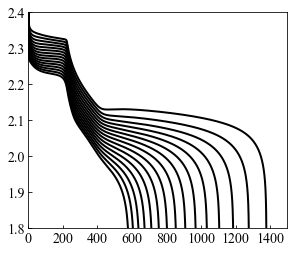

In [47]:
os.chdir(owd)
os.chdir('Figures/voltage/Lithiated/100 um 85% porosity 25 um sep')
for i in np.arange(0, len(keys), 1):
    fig = plt.figure(1)
    ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
    ax.tick_params(direction='in')
    fig.set_size_inches((6., 4.))
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    print(keys[i])
    p1, = plt.plot(Cap_Li_85pct25um[keys[i]], Vcell_Li_85pct25um[keys[i]], 'k-', linewidth=lw)
    
    plt.xlim((0, 1500))
    plt.ylim((1.8, 2.4))
    if i == len(keys)-1:
        fig.savefig('Vcell_range.png')
os.chdir(owd)

## 1.2 100 um 85% porous cathode 20 um sep

In [ ]:
os.chdir(owd)
os.chdir('Figures/voltage/Lithiated/100 um 85% porosity 20 um sep')
for i in np.arange(0, len(keys), 1):
    fig = plt.figure(1)
    ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
    ax.tick_params(direction='in')
    fig.set_size_inches((6., 4.))
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    print(keys[i])
    p1, = plt.plot(Cap_Li_85pct20um[keys[i]], Vcell_Li_85pct20um[keys[i]], 'k-', linewidth=lw)
    
    plt.xlim((0, 1500))
    plt.ylim((1.8, 2.4))
    if i == len(keys)-1:
        fig.savefig('Vcell_range.png')
os.chdir(owd)

## 1.3 100 um 85% porous cathode 15 um sep

In [ ]:
os.chdir(owd)
os.chdir('Figures/voltage/Lithiated/100 um 85% porosity 15 um sep')
for i in np.arange(0, len(keys), 1):
    fig = plt.figure(1)
    ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
    ax.tick_params(direction='in')
    fig.set_size_inches((6., 4.))
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    print(keys[i])
    p1, = plt.plot(Cap_Li_85pct15um[keys[i]], Vcell_Li_85pct15um[keys[i]], 'k-', linewidth=lw)
    
    plt.xlim((0, 1500))
    plt.ylim((1.8, 2.4))
    if i == len(keys)-1:
        fig.savefig('Vcell_range.png')
os.chdir(owd)

## 1.4 100 um 85% porous cathode 10 um sep

In [ ]:
os.chdir(owd)
os.chdir('Figures/voltage/Lithiated/100 um 85% porosity 10 um sep')
for i in np.arange(0, len(keys), 1):
    fig = plt.figure(1)
    ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
    ax.tick_params(direction='in')
    fig.set_size_inches((6., 4.))
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    print(keys[i])
    p1, = plt.plot(Cap_Li_85pct10um[keys[i]], Vcell_Li_85pct10um[keys[i]], 'k-', linewidth=lw)
    
    plt.xlim((0, 1500))
    plt.ylim((1.8, 2.4))
    if i == len(keys)-1:
        fig.savefig('Vcell_range.png')
os.chdir(owd)

## 1.5 100 um 65% porous cathode 25 um sep

In [ ]:
os.chdir(owd)
os.chdir('Figures/voltage/Lithiated/100 um 65% porosity 25 um sep')
for i in np.arange(0, len(keys), 1):
    fig = plt.figure(1)
    ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
    ax.tick_params(direction='in')
    fig.set_size_inches((6., 4.))
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    print(keys[i])
    p1, = plt.plot(Cap_Li_65pct25um[keys[i]], Vcell_Li_65pct25um[keys[i]], 'k-', linewidth=lw)
    
    plt.xlim((0, 1500))
    plt.ylim((1.8, 2.4))
    if i == len(keys)-1:
        fig.savefig('Vcell_range.png')
os.chdir(owd)

## 1.6 100 um 45% porous cathode 25 um sep

In [ ]:
os.chdir(owd)
os.chdir('Figures/voltage/Lithiated/100 um 45% porosity 25 um sep')
for i in np.arange(0, len(keys), 1):
    fig = plt.figure(1)
    ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
    ax.tick_params(direction='in')
    fig.set_size_inches((6., 4.))
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    print(keys[i])
    p1, = plt.plot(Cap_Li_45pct25um[keys[i]], Vcell_Li_45pct25um[keys[i]], 'k-', linewidth=lw)
    
    plt.xlim((0, 1500))
    plt.ylim((1.8, 2.4))
    if i == len(keys)-1:
        fig.savefig('Vcell_range.png')
os.chdir(owd)

## 1.7 100 um 45% porous cathode 10 um sep

In [ ]:
os.chdir(owd)
os.chdir('Figures/voltage/Lithiated/100 um 45% porosity 10 um sep')
for i in np.arange(0, len(keys), 1):
    fig = plt.figure(1)
    ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
    ax.tick_params(direction='in')
    fig.set_size_inches((6., 4.))
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    print(keys[i])
    p1, = plt.plot(Cap_Li_45pct10um[keys[i]], Vcell_Li_45pct10um[keys[i]], 'k-', linewidth=lw)
    
    plt.xlim((0, 1500))
    plt.ylim((1.8, 2.4))
    if i == len(keys)-1:
        fig.savefig('Vcell_range.png')
os.chdir(owd)

# Section 2 - Plotting voltage of varying designs at C-rate

## Comparison of lithiated mech. and Andrei data

In [16]:
exp_data_01C = pd.read_csv(r'0.1C Data.csv', header=None)
exp_data_05C = pd.read_csv(r'0.5C Data.csv', header=None)
exp_data_1C = pd.read_csv(r'1C Data.csv', header=None)

['dch0.1C', 'dch0.5C', 'dch1.0C', 'dch1.5C']


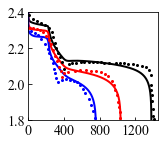

In [19]:
os.chdir(owd)
os.chdir('Figures/voltage/Andrei validation')
fig = plt.figure(1)
ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
ax.tick_params(direction='in')
fig.set_size_inches((3., 2.))

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
print(keys_s)
p1, = plt.plot(Cap_Li_85pct25um[keys_s[0]], Vcell_Li_85pct25um[keys_s[0]], 'k-', linewidth=lw)
p2, = plt.plot(Cap_Li_85pct25um[keys_s[1]], Vcell_Li_85pct25um[keys_s[1]], 'r-', linewidth=lw)
p3, = plt.plot(Cap_Li_85pct25um[keys_s[2]], Vcell_Li_85pct25um[keys_s[2]], 'b-', linewidth=lw)

p4, = plt.plot(exp_data_01C.iloc[:,0], exp_data_01C.iloc[:,1], 'ko', markersize=2.)
p5, = plt.plot(exp_data_05C.iloc[:,0], exp_data_05C.iloc[:,1], 'ro', markersize=2.)
p6, = plt.plot(exp_data_1C.iloc[:,0], exp_data_1C.iloc[:,1], 'bo', markersize=2.)

plt.xlim((0, 1450))
plt.xticks([0, 400, 800, 1200])
plt.ylim((1.8, 2.4))

fig.savefig('Vcell_Andrei_data.pdf')
os.chdir(owd)

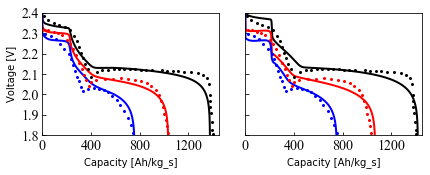

In [41]:
os.chdir(owd)
os.chdir('Figures/voltage/Andrei comparison')

fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, num=i)
plt.tight_layout()
axs[0].tick_params(direction='in')
axs[1].tick_params(direction='in')
fig.set_size_inches((6., 2.))

for tick in axs[0].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[0].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[1].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[1].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
    
#for tick in axs[2].xaxis.get_major_ticks():
#    tick.label1.set_fontsize(fs)
#    tick.label1.set_fontname(font)
#for tick in axs[2].yaxis.get_major_ticks():
#    tick.label1.set_fontsize(fs)
#    tick.label1.set_fontname(font)

axs[0].plot(Cap_Li_85pct25um[keys_s[0]], Vcell_Li_85pct25um[keys_s[0]], 'k-', linewidth=lw)
axs[0].plot(Cap_Li_85pct25um[keys_s[1]], Vcell_Li_85pct25um[keys_s[1]], 'r-', linewidth=lw)
axs[0].plot(Cap_Li_85pct25um[keys_s[2]], Vcell_Li_85pct25um[keys_s[2]], 'b-', linewidth=lw)
 
axs[0].plot(exp_data_01C.iloc[:,0], exp_data_01C.iloc[:,1], 'ko', markersize=2.)
axs[0].plot(exp_data_05C.iloc[:,0], exp_data_05C.iloc[:,1], 'ro', markersize=2.)
axs[0].plot(exp_data_1C.iloc[:,0], exp_data_1C.iloc[:,1], 'bo', markersize=2.)
    
axs[1].plot(Cap_cascade_85pct25um[keys_s[0]], Vcell_cascade_85pct25um[keys_s[0]], 'k-', linewidth=lw)
axs[1].plot(Cap_cascade_85pct25um[keys_s[1]], Vcell_cascade_85pct25um[keys_s[1]], 'r-', linewidth=lw)
axs[1].plot(Cap_cascade_85pct25um[keys_s[2]], Vcell_cascade_85pct25um[keys_s[2]], 'b-', linewidth=lw)

axs[1].plot(exp_data_01C.iloc[:,0], exp_data_01C.iloc[:,1], 'ko', markersize=2.)
axs[1].plot(exp_data_05C.iloc[:,0], exp_data_05C.iloc[:,1], 'ro', markersize=2.)
axs[1].plot(exp_data_1C.iloc[:,0], exp_data_1C.iloc[:,1], 'bo', markersize=2.)

#axs[2].plot(Cap_bessler_85pct25um[keys_s[0]], Vcell_bessler_85pct25um[keys_s[0]], 'k-', linewidth=lw)
#axs[2].plot(Cap_bessler_85pct25um[keys_s[1]], Vcell_bessler_85pct25um[keys_s[1]], 'r-', linewidth=lw)
#axs[2].plot(Cap_bessler_85pct25um[keys_s[2]], Vcell_bessler_85pct25um[keys_s[2]], 'b-', linewidth=lw)

#axs[2].plot(exp_data_01C.iloc[:,0], exp_data_01C.iloc[:,1], 'ko', markersize=2.)
#axs[2].plot(exp_data_05C.iloc[:,0], exp_data_05C.iloc[:,1], 'ro', markersize=2.)
#axs[2].plot(exp_data_1C.iloc[:,0], exp_data_1C.iloc[:,1], 'bo', markersize=2.)

axs[0].set_xlabel('Capacity [Ah/kg_s]')
axs[1].set_xlabel('Capacity [Ah/kg_s]')
axs[0].set_ylabel('Voltage [V]')
plt.xlim((0, 1450))
plt.xticks([0, 400, 800, 1200])
plt.ylim((1.8, 2.4))

fig.savefig('Vcell_Andrei_data.pdf')
os.chdir(owd)

## Comparison of lithiated, non-lithiated, Assary, and Kuzmina mechs. voltage versus capacity

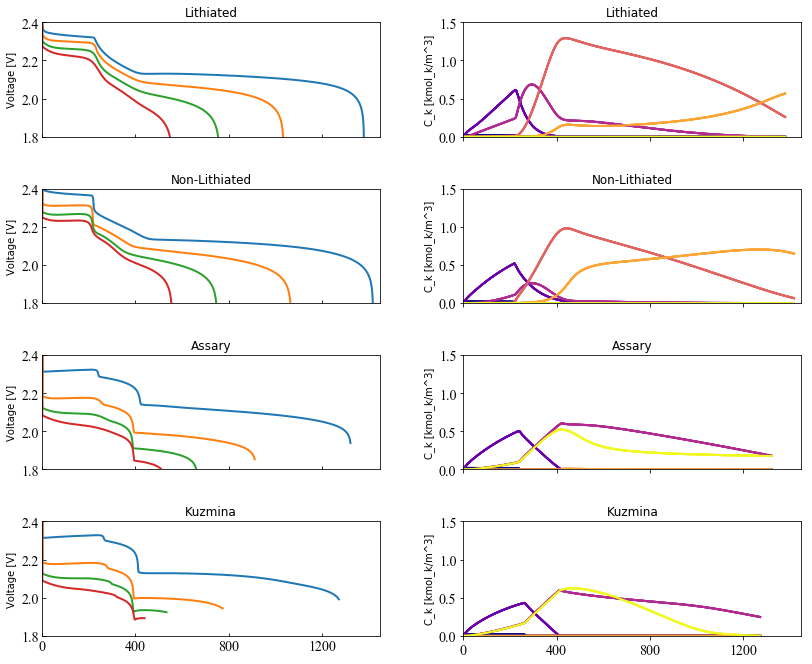

In [78]:
os.chdir(owd)
os.chdir('Figures/voltage/mechanism comparison')

fig, axs = plt.subplots(4, 2, sharex=True, sharey=False, num=i)
plt.tight_layout()
axs[0,0].tick_params(direction='in')
axs[1,0].tick_params(direction='in')
axs[2,0].tick_params(direction='in')
axs[3,0].tick_params(direction='in')
fig.set_size_inches((12., 10.))

for tick in axs[0,0].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[0,0].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[1,0].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[1,0].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[2,0].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[2,0].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[3,0].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[3,0].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
    
for tick in axs[0,1].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[0,1].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[1,1].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[1,1].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[2,1].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[2,1].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[3,1].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[3,1].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

axs[0,0].plot(Cap_Li_65pct25um[keys_s[0]], Vcell_Li_65pct25um[keys_s[0]], linewidth=lw)
axs[0,0].plot(Cap_Li_65pct25um[keys_s[1]], Vcell_Li_65pct25um[keys_s[1]], linewidth=lw)
axs[0,0].plot(Cap_Li_65pct25um[keys_s[2]], Vcell_Li_65pct25um[keys_s[2]], linewidth=lw)
axs[0,0].plot(Cap_Li_65pct25um[keys_s[3]], Vcell_Li_65pct25um[keys_s[3]], linewidth=lw)

axs[1,0].plot(Cap_cascade_65pct25um[keys_s[0]], Vcell_cascade_65pct25um[keys_s[0]], linewidth=lw)
axs[1,0].plot(Cap_cascade_65pct25um[keys_s[1]], Vcell_cascade_65pct25um[keys_s[1]], linewidth=lw)
axs[1,0].plot(Cap_cascade_65pct25um[keys_s[2]], Vcell_cascade_65pct25um[keys_s[2]], linewidth=lw)
axs[1,0].plot(Cap_cascade_65pct25um[keys_s[3]], Vcell_cascade_65pct25um[keys_s[3]], linewidth=lw)

axs[2,0].plot(Cap_assary_65pct25um[keys_s[0]], Vcell_assary_65pct25um[keys_s[0]], linewidth=lw)
axs[2,0].plot(Cap_assary_65pct25um[keys_s[1]], Vcell_assary_65pct25um[keys_s[1]], linewidth=lw)
axs[2,0].plot(Cap_assary_65pct25um[keys_s[2]], Vcell_assary_65pct25um[keys_s[2]], linewidth=lw)
axs[2,0].plot(Cap_assary_65pct25um[keys_s[3]], Vcell_assary_65pct25um[keys_s[3]], linewidth=lw)

axs[3,0].plot(Cap_kuzmina_65pct25um[keys_s[0]], Vcell_kuzmina_65pct25um[keys_s[0]], linewidth=lw)
axs[3,0].plot(Cap_kuzmina_65pct25um[keys_s[1]], Vcell_kuzmina_65pct25um[keys_s[1]], linewidth=lw)
axs[3,0].plot(Cap_kuzmina_65pct25um[keys_s[2]], Vcell_kuzmina_65pct25um[keys_s[2]], linewidth=lw)
axs[3,0].plot(Cap_kuzmina_65pct25um[keys_s[3]], Vcell_kuzmina_65pct25um[keys_s[3]], linewidth=lw)

for i in np.arange(0, 1, 1):
    for j in np.arange(0, inputs.npoints_cathode):
        offset = j*6
        for k in np.arange(0, 6):
            axs[0,1].plot(Cap_Li_65pct25um[keys_s[i]], C_k_Li_65pct25um[keys_s[i]].iloc[:, k+offset], 
                     linewidth=lw, color=species_cmap[k])
            axs[1,1].plot(Cap_cascade_65pct25um[keys_s[i]], C_k_cascade_65pct25um[keys_s[i]].iloc[:, k+offset], 
                     linewidth=lw, color=species_cmap[k])
            axs[2,1].plot(Cap_assary_65pct25um[keys_s[i]], C_k_assary_65pct25um[keys_s[i]].iloc[:, k+offset],
                         linewidth=lw, color=species_cmap[k])
            axs[3,1].plot(Cap_kuzmina_65pct25um[keys_s[i]], C_k_kuzmina_65pct25um[keys_s[i]].iloc[:, k+offset],
                         linewidth=lw, color=species_cmap[k])

axs[0,0].title.set_text('Lithiated')
axs[1,0].title.set_text('Non-Lithiated')
axs[2,0].title.set_text('Assary')
axs[3,0].title.set_text('Kuzmina')

axs[0,1].title.set_text('Lithiated')
axs[1,1].title.set_text('Non-Lithiated')
axs[2,1].title.set_text('Assary')
axs[3,1].title.set_text('Kuzmina')
#plt.legend(['0.1C', '0.5C', '1C', '1.5C'])
plt.xlim((0, 1450))
plt.xticks([0, 400, 800, 1200])

axs[0,0].set_ylim((1.8,2.4))
axs[1,0].set_ylim((1.8,2.4))
axs[2,0].set_ylim((1.8,2.4))
axs[3,0].set_ylim((1.8,2.4))
axs[0,0].set_yticks([1.8, 2.0, 2.2, 2.4])
axs[1,0].set_yticks([1.8, 2.0, 2.2, 2.4])
axs[2,0].set_yticks([1.8, 2.0, 2.2, 2.4])
axs[3,0].set_yticks([1.8, 2.0, 2.2, 2.4])

axs[0,0].set_ylabel('Voltage [V]')
axs[1,0].set_ylabel('Voltage [V]')
axs[2,0].set_ylabel('Voltage [V]')
axs[3,0].set_ylabel('Voltage [V]')

axs[0,1].set_ylim((0.0,1.5))
axs[1,1].set_ylim((0.0,1.5))
axs[2,1].set_ylim((0.0,1.5))
axs[3,1].set_ylim((0.0,1.5))
axs[0,1].set_yticks([0.0, 0.5, 1.0, 1.5])
axs[1,1].set_yticks([0.0, 0.5, 1.0, 1.5])
axs[2,1].set_yticks([0.0, 0.5, 1.0, 1.5])
axs[3,1].set_yticks([0.0, 0.5, 1.0, 1.5])

axs[0,1].set_ylabel('C_k [kmol_k/m^3]')
axs[1,1].set_ylabel('C_k [kmol_k/m^3]')
axs[2,1].set_ylabel('C_k [kmol_k/m^3]')
axs[3,1].set_ylabel('C_k [kmol_k/m^3]')

#fig.savefig('Vcell_mech_comp.pdf')
os.chdir(owd)

## Comparison of lithiated, non-lithiated, Assary, and Kuzmina mechs. concentrations versus capacity

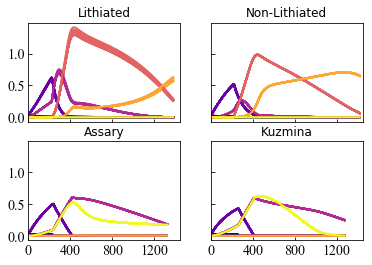

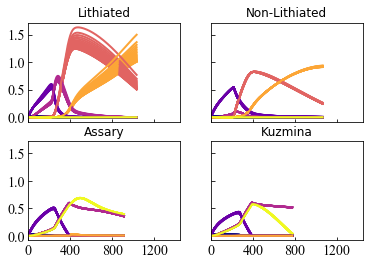

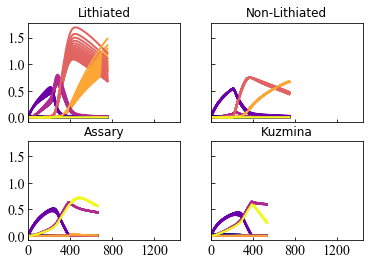

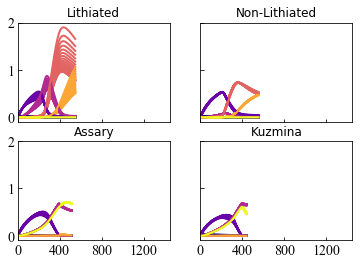

In [51]:
os.chdir(owd)
os.chdir('Figures/species concentrations/mechanism comparison')

for i in np.arange(0, len(keys_s), 1):
    fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, num=i)
    axs[0,0].tick_params(direction='in')
    axs[1,0].tick_params(direction='in')
    axs[0,1].tick_params(direction='in')
    axs[1,1].tick_params(direction='in')
    fig.set_size_inches((6., 4.))

    for tick in axs[0,0].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in axs[0,0].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)

    for tick in axs[1,0].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in axs[1,0].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)

    for tick in axs[0,1].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in axs[0,1].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)

    for tick in axs[1,1].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in axs[1,1].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)

    for j in np.arange(0, inputs.npoints_cathode):
        offset = j*6
        for k in np.arange(0, 6):
            axs[0,0].plot(Cap_Li_65pct25um[keys_s[i]], C_k_Li_65pct25um[keys_s[i]].iloc[:, k+offset], 
                     linewidth=lw, color=species_cmap[k])
            axs[0,1].plot(Cap_cascade_65pct25um[keys_s[i]], C_k_cascade_65pct25um[keys_s[i]].iloc[:, k+offset], 
                     linewidth=lw, color=species_cmap[k])
            axs[1,0].plot(Cap_assary_65pct25um[keys_s[i]], C_k_assary_65pct25um[keys_s[i]].iloc[:, k+offset],
                         linewidth=lw, color=species_cmap[k])
            axs[1,1].plot(Cap_kuzmina_65pct25um[keys_s[i]], C_k_kuzmina_65pct25um[keys_s[i]].iloc[:, k+offset],
                         linewidth=lw, color=species_cmap[k])

    axs[0,0].title.set_text('Lithiated')
    axs[0,1].title.set_text('Non-Lithiated')
    axs[1,0].title.set_text('Assary')
    axs[1,1].title.set_text('Kuzmina')
    plt.xlim((0, 1450))
    plt.xticks([0, 400, 800, 1200])

    fig.savefig('Ck_mech_comp' + keys_s[i] + '.pdf')
    os.chdir(owd)

## Varying cathode porosity at 25 um sep over four C-rates

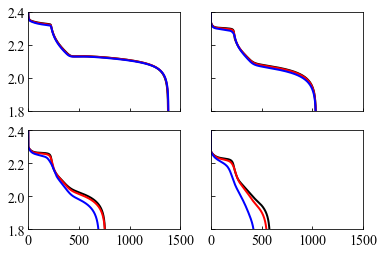

In [52]:
os.chdir(owd)
os.chdir('Figures/voltage/Lithiated/Cathode porosity study 25 um sep')

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, num=0)
axs[0,0].tick_params(direction='in')
axs[1,0].tick_params(direction='in')
axs[0,1].tick_params(direction='in')
axs[1,1].tick_params(direction='in')
fig.set_size_inches((6., 4.))

for tick in axs[0,0].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[0,0].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[1,0].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[1,0].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[0,1].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[0,1].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[1,1].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[1,1].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

axs[0,0].plot(Cap_Li_85pct25um[keys_s[0]], Vcell_Li_85pct25um[keys_s[0]], 'k-', linewidth=lw)
axs[0,0].plot(Cap_Li_65pct25um[keys_s[0]], Vcell_Li_65pct25um[keys_s[0]], 'r-', linewidth=lw)
axs[0,0].plot(Cap_Li_45pct25um[keys_s[0]], Vcell_Li_45pct25um[keys_s[0]], 'b-', linewidth=lw)

axs[0,1].plot(Cap_Li_85pct25um[keys_s[1]], Vcell_Li_85pct25um[keys_s[1]], 'k-', linewidth=lw)
axs[0,1].plot(Cap_Li_65pct25um[keys_s[1]], Vcell_Li_65pct25um[keys_s[1]], 'r-', linewidth=lw)
axs[0,1].plot(Cap_Li_45pct25um[keys_s[1]], Vcell_Li_45pct25um[keys_s[1]], 'b-', linewidth=lw)

axs[1,0].plot(Cap_Li_85pct25um[keys_s[2]], Vcell_Li_85pct25um[keys_s[2]], 'k-', linewidth=lw)
axs[1,0].plot(Cap_Li_65pct25um[keys_s[2]], Vcell_Li_65pct25um[keys_s[2]], 'r-', linewidth=lw)
axs[1,0].plot(Cap_Li_45pct25um[keys_s[2]], Vcell_Li_45pct25um[keys_s[2]], 'b-', linewidth=lw)

axs[1,1].plot(Cap_Li_85pct25um[keys_s[3]], Vcell_Li_85pct25um[keys_s[3]], 'k-', linewidth=lw)
axs[1,1].plot(Cap_Li_65pct25um[keys_s[3]], Vcell_Li_65pct25um[keys_s[3]], 'r-', linewidth=lw)
axs[1,1].plot(Cap_Li_45pct25um[keys_s[3]], Vcell_Li_45pct25um[keys_s[3]], 'b-', linewidth=lw)
    
plt.xlim((0, 1500))
plt.ylim((1.8, 2.4))
fig.savefig('Vcell_25um_sep.pdf')
os.chdir(owd)

## Varying cathode porosity at 10 um sep over four C-rates

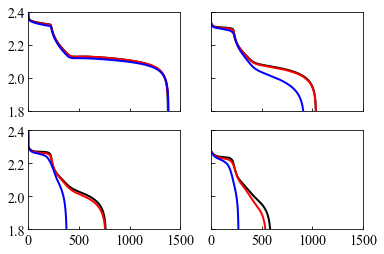

In [53]:
os.chdir(owd)
os.chdir('Figures/voltage/Lithiated/Cathode porosity study 10 um sep')

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, num=0)
axs[0,0].tick_params(direction='in')
axs[1,0].tick_params(direction='in')
axs[0,1].tick_params(direction='in')
axs[1,1].tick_params(direction='in')
fig.set_size_inches((6., 4.))

for tick in axs[0,0].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[0,0].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[1,0].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[1,0].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[0,1].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[0,1].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[1,1].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[1,1].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

axs[0,0].plot(Cap_Li_85pct10um[keys_s[0]], Vcell_Li_85pct10um[keys_s[0]], 'k-', linewidth=lw)
axs[0,0].plot(Cap_Li_65pct10um[keys_s[0]], Vcell_Li_65pct10um[keys_s[0]], 'r-', linewidth=lw)
axs[0,0].plot(Cap_Li_45pct10um[keys_s[0]], Vcell_Li_45pct10um[keys_s[0]], 'b-', linewidth=lw)

axs[0,1].plot(Cap_Li_85pct10um[keys_s[1]], Vcell_Li_85pct10um[keys_s[1]], 'k-', linewidth=lw)
axs[0,1].plot(Cap_Li_65pct10um[keys_s[1]], Vcell_Li_65pct10um[keys_s[1]], 'r-', linewidth=lw)
axs[0,1].plot(Cap_Li_45pct10um[keys_s[1]], Vcell_Li_45pct10um[keys_s[1]], 'b-', linewidth=lw)

axs[1,0].plot(Cap_Li_85pct10um[keys_s[2]], Vcell_Li_85pct10um[keys_s[2]], 'k-', linewidth=lw)
axs[1,0].plot(Cap_Li_65pct10um[keys_s[2]], Vcell_Li_65pct10um[keys_s[2]], 'r-', linewidth=lw)
axs[1,0].plot(Cap_Li_45pct10um[keys_s[2]], Vcell_Li_45pct10um[keys_s[2]], 'b-', linewidth=lw)

axs[1,1].plot(Cap_Li_85pct10um[keys_s[3]], Vcell_Li_85pct10um[keys_s[3]], 'k-', linewidth=lw)
axs[1,1].plot(Cap_Li_65pct10um[keys_s[3]], Vcell_Li_65pct10um[keys_s[3]], 'r-', linewidth=lw)
axs[1,1].plot(Cap_Li_45pct10um[keys_s[3]], Vcell_Li_45pct10um[keys_s[3]], 'b-', linewidth=lw)
    
plt.xlim((0, 1500))
plt.ylim((1.8, 2.4))
fig.savefig('Vcell_10um_sep.pdf')
os.chdir(owd)

## Species profiles as function of C-rate

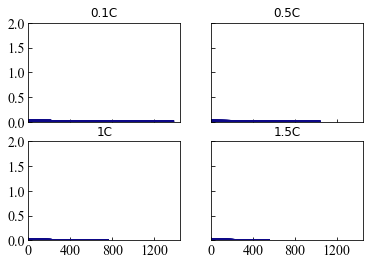

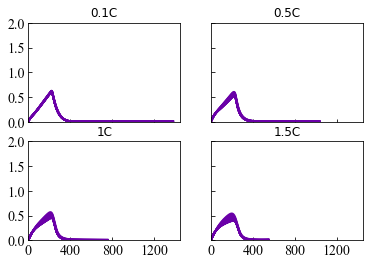

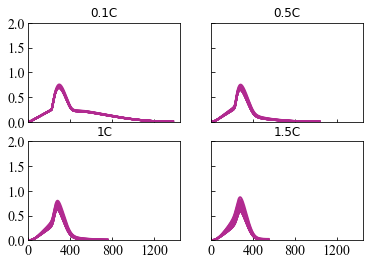

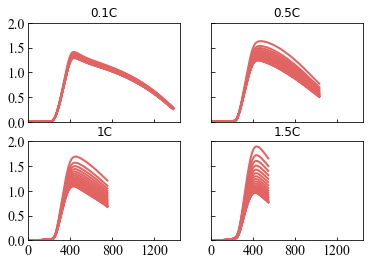

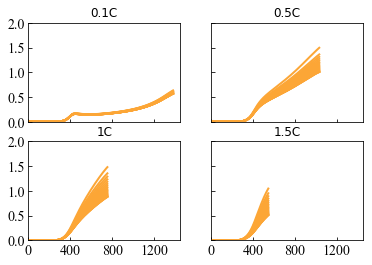

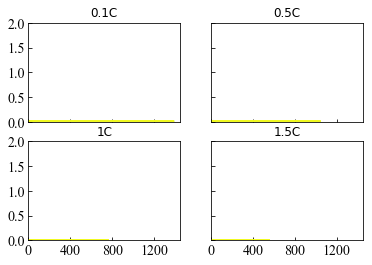

In [54]:
os.chdir(owd)
os.chdir('Figures/species concentrations/species comparison')

for k in np.arange(0, 6, 1):
    fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, num=k)
    axs[0,0].tick_params(direction='in')
    axs[1,0].tick_params(direction='in')
    axs[0,1].tick_params(direction='in')
    axs[1,1].tick_params(direction='in')
    fig.set_size_inches((6., 4.))

    for tick in axs[0,0].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in axs[0,0].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)

    for tick in axs[1,0].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in axs[1,0].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)

    for tick in axs[0,1].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in axs[0,1].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)

    for tick in axs[1,1].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in axs[1,1].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)

    for j in np.arange(0, inputs.npoints_cathode):
        offset = j*6
        p1, = axs[0,0].plot(Cap_Li_65pct25um[keys_s[0]], C_k_Li_65pct25um[keys_s[0]].iloc[:, k+offset], 
                 linewidth=lw, color=species_cmap[k])
        p2, = axs[0,1].plot(Cap_Li_65pct25um[keys_s[1]], C_k_Li_65pct25um[keys_s[1]].iloc[:, k+offset], 
                 linewidth=lw, color=species_cmap[k])
        p3, = axs[1,0].plot(Cap_Li_65pct25um[keys_s[2]], C_k_Li_65pct25um[keys_s[2]].iloc[:, k+offset],
                     linewidth=lw, color=species_cmap[k])
        p4, = axs[1,1].plot(Cap_Li_65pct25um[keys_s[3]], C_k_Li_65pct25um[keys_s[3]].iloc[:, k+offset],
                     linewidth=lw, color=species_cmap[k])

    axs[0,0].title.set_text('0.1C')
    axs[0,1].title.set_text('0.5C')
    axs[1,0].title.set_text('1C')
    axs[1,1].title.set_text('1.5C')
    plt.xlim((0, 1450))
    plt.xticks([0, 400, 800, 1200])
    plt.ylim((0, 2))
    fig.savefig('Ck_' + species[k] + '.pdf')
    
os.chdir(owd)

## Li+ concentration as a function of position 10 um sep

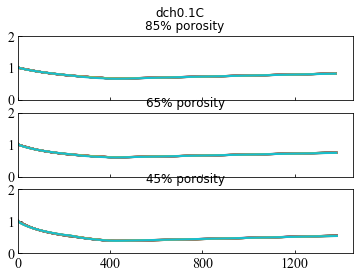

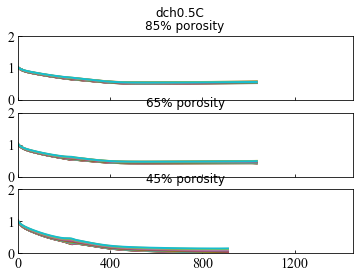

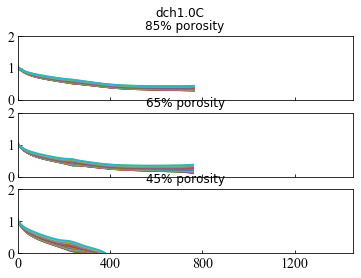

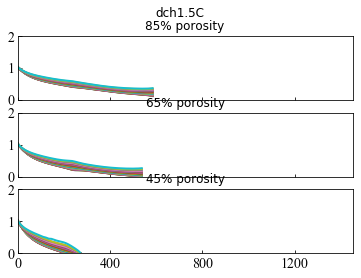

In [69]:
os.chdir(owd)
os.chdir('Figures/species concentrations/Li+ concentrations')

for i in np.arange(0, len(keys_s), 1):
    fig, axs = plt.subplots(3, 1, sharex=True, sharey=True, num=i)
    axs[0].tick_params(direction='in')
    axs[1].tick_params(direction='in')
    axs[2].tick_params(direction='in')
    #axs[1,1].tick_params(direction='in')
    
    fig.set_size_inches((6., 4.))

    for tick in axs[0].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in axs[0].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)

    for tick in axs[1].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in axs[1].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)

    for tick in axs[2].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in axs[2].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)

    #for tick in axs[1,1].xaxis.get_major_ticks():
    #    tick.label1.set_fontsize(fs)
    #    tick.label1.set_fontname(font)
    #for tick in axs[1,1].yaxis.get_major_ticks():
    #    tick.label1.set_fontsize(fs)
    #    tick.label1.set_fontname(font)

    for j in np.arange(0, inputs.npoints_cathode):
        #offset = j*6
        p1, = axs[0].plot(Cap_Li_85pct10um[keys_s[i]], C_Lip_85pct10um[keys_s[i]].iloc[:, j], 
                 linewidth=lw)
        p2, = axs[1].plot(Cap_Li_65pct10um[keys_s[i]], C_Lip_65pct10um[keys_s[i]].iloc[:, j], 
                 linewidth=lw)
        p3, = axs[2].plot(Cap_Li_45pct10um[keys_s[i]], C_Lip_45pct10um[keys_s[i]].iloc[:, j],
                     linewidth=lw)

    axs[0].title.set_text('85% porosity')
    axs[1].title.set_text('65% porosity')
    axs[2].title.set_text('45% porosity')
    #axs[1,1].title.set_text('1.5C')
    plt.xlim((0, 1450))
    plt.xticks([0, 400, 800, 1200])
    plt.ylim((0, 2))
    fig.suptitle(keys_s[i])
    fig.savefig('C_Lip' + keys_s[i] + '.pdf')
    
os.chdir(owd)

## Li+ concentration as a function of position 25 um sep

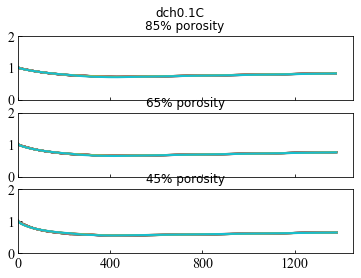

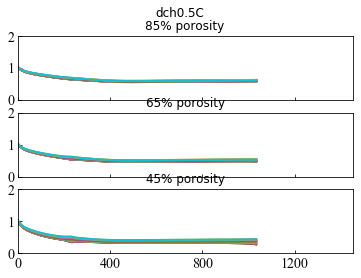

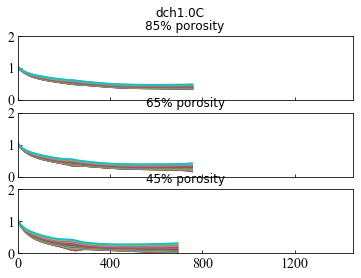

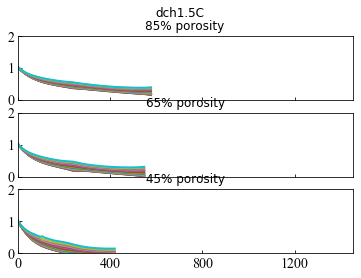

In [70]:
os.chdir(owd)
os.chdir('Figures/species concentrations/Li+ concentrations')

for i in np.arange(0, len(keys_s), 1):
    fig, axs = plt.subplots(3, 1, sharex=True, sharey=True, num=i)
    axs[0].tick_params(direction='in')
    axs[1].tick_params(direction='in')
    axs[2].tick_params(direction='in')
    #axs[1,1].tick_params(direction='in')
    
    fig.set_size_inches((6., 4.))

    for tick in axs[0].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in axs[0].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)

    for tick in axs[1].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in axs[1].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)

    for tick in axs[2].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in axs[2].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)

    #for tick in axs[1,1].xaxis.get_major_ticks():
    #    tick.label1.set_fontsize(fs)
    #    tick.label1.set_fontname(font)
    #for tick in axs[1,1].yaxis.get_major_ticks():
    #    tick.label1.set_fontsize(fs)
    #    tick.label1.set_fontname(font)

    for j in np.arange(0, inputs.npoints_cathode):
        #offset = j*6
        p1, = axs[0].plot(Cap_Li_85pct25um[keys_s[i]], C_Lip_85pct25um[keys_s[i]].iloc[:, j], 
                 linewidth=lw)
        p2, = axs[1].plot(Cap_Li_65pct25um[keys_s[i]], C_Lip_65pct25um[keys_s[i]].iloc[:, j], 
                 linewidth=lw)
        p3, = axs[2].plot(Cap_Li_45pct25um[keys_s[i]], C_Lip_45pct25um[keys_s[i]].iloc[:, j],
                     linewidth=lw)

    axs[0].title.set_text('85% porosity')
    axs[1].title.set_text('65% porosity')
    axs[2].title.set_text('45% porosity')
    #axs[1,1].title.set_text('1.5C')
    plt.xlim((0, 1450))
    plt.xticks([0, 400, 800, 1200])
    plt.ylim((0, 2))
    fig.suptitle(keys_s[i])
    fig.savefig('C_Lip_25um_' + keys_s[i] + '.pdf')
    
os.chdir(owd)

## 2.1 varying cathode porosity 25 um sep

In [ ]:
os.chdir(owd)
os.chdir('Figures/voltage/Lithiated/Cathode porosity study 25 um sep')
for i in np.arange(0, len(keys), 1):
    fig = plt.figure(i)
    ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
    ax.tick_params(direction='in')
    fig.set_size_inches((6., 4.))
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    print(keys[i])
    p1, = plt.plot(Cap_Li_85pct25um[keys[i]], Vcell_Li_85pct25um[keys[i]], 'k-', linewidth=lw)
    p2, = plt.plot(Cap_Li_65pct25um[keys[i]], Vcell_Li_65pct25um[keys[i]], 'r-', linewidth=lw)
    p3, = plt.plot(Cap_Li_45pct25um[keys[i]], Vcell_Li_45pct25um[keys[i]], 'b-', linewidth=lw)
    
    plt.xlim((0, 1500))
    plt.ylim((1.8, 2.4))
    fig.savefig('Vcell' + keys[i] + '.png')
os.chdir(owd)

## 2.2 varying cathode porosity at 10 um sep

In [ ]:
os.chdir(owd)
os.chdir('Figures/voltage/Lithiated/Cathode porosity study 10 um sep')
for i in np.arange(0, len(keys), 1):
    fig = plt.figure(i)
    ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
    ax.tick_params(direction='in')
    fig.set_size_inches((6., 4.))
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    print(keys[i])
    p1, = plt.plot(Cap_Li_85pct10um[keys[i]], Vcell_Li_85pct10um[keys[i]], 'k-', linewidth=lw)
    p2, = plt.plot(Cap_Li_45pct10um[keys[i]], Vcell_Li_45pct10um[keys[i]], 'r-', linewidth=lw)
    
    plt.xlim((0, 1500))
    plt.ylim((1.8, 2.4))
    fig.savefig('Vcell' + keys[i] + '.png')
os.chdir(owd)

## 2.3 varying separator thickness at 85% cathode porosity

In [ ]:
os.chdir(owd)
os.chdir('Figures/voltage/Lithiated/Separator thickness study 85% cathode')
for i in np.arange(0, len(keys), 1):
    fig = plt.figure(i)
    ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
    ax.tick_params(direction='in')
    fig.set_size_inches((6., 4.))
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    print(keys[i])
    p1, = plt.plot(Cap_Li_85pct25um[keys[i]], Vcell_Li_85pct25um[keys[i]], 'k-', linewidth=lw)
    p2, = plt.plot(Cap_Li_85pct20um[keys[i]], Vcell_Li_85pct20um[keys[i]], 'r-', linewidth=lw)
    p3, = plt.plot(Cap_Li_85pct15um[keys[i]], Vcell_Li_85pct15um[keys[i]], 'b-', linewidth=lw)
    p4, = plt.plot(Cap_Li_85pct10um[keys[i]], Vcell_Li_85pct10um[keys[i]], 'y-', linewidth=lw)
    
    plt.xlim((0, 1500))
    plt.ylim((1.8, 2.4))
    fig.savefig('Vcell' + keys[i] + '.png')
os.chdir(owd)

## 2.4 varying separator thickness at 45% cathode porosity

In [ ]:
os.chdir(owd)
os.chdir('Figures/voltage/Lithiated/Separator thickness study 45% cathode')
for i in np.arange(0, len(keys), 1):
    fig = plt.figure(i)
    ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
    ax.tick_params(direction='in')
    fig.set_size_inches((6., 4.))
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    print(keys[i])
    p1, = plt.plot(Cap_Li_45pct25um[keys[i]], Vcell_Li_45pct25um[keys[i]], 'k-', linewidth=lw)
    p2, = plt.plot(Cap_Li_45pct10um[keys[i]], Vcell_Li_45pct10um[keys[i]], 'r-', linewidth=lw)
    
    plt.xlim((0, 1500))
    plt.ylim((1.8, 2.4))
    fig.savefig('Vcell' + keys[i] + '.png')
os.chdir(owd)

# Section 3 - Plotting species concentrations of multiple mechanisms together at varying C-rates

## 100 um 85% porosity cathode 25 um sep

In [ ]:
os.chdir(owd)
os.chdir('Figures/species concentrations/100 um 85% porosity 25 um sep')
for i in np.arange(0, len(keys)):
    fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, num=i)
    axs[0,0].tick_params(direction='in')
    axs[1,0].tick_params(direction='in')
    axs[0,1].tick_params(direction='in')
    axs[1,1].tick_params(direction='in')
    fig.set_size_inches((6., 4.))
    
    for tick in axs[0,0].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs-4)
        tick.label1.set_fontname(font)
    for tick in axs[0,0].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs-4)
        tick.label1.set_fontname(font)
        
    for tick in axs[1,0].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs-4)
        tick.label1.set_fontname(font)
    for tick in axs[1,0].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs-4)
        tick.label1.set_fontname(font)
        
    for tick in axs[0,1].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs-4)
        tick.label1.set_fontname(font)
    for tick in axs[0,1].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs-4)
        tick.label1.set_fontname(font)
    
    for tick in axs[1,1].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs-4)
        tick.label1.set_fontname(font)
    for tick in axs[1,1].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs-4)
        tick.label1.set_fontname(font)

    for j in np.arange(0, inputs.npoints_cathode):
        offset = j*6
        for k in np.arange(0, 6):
            axs[0,0].plot(Cap_Li_85pct25um[keys[i]], C_k_Li_85pct25um[keys[i]].iloc[:, k+offset], 
                     linewidth=lw, color=species_cmap[k])
            axs[0,1].plot(Cap_cascade_85pct25um[keys[i]], C_k_cascade_85pct25um[keys[i]].iloc[:, k+offset], 
                     linewidth=lw, color=species_cmap[k])
            #ax3.plot(Cap_cascade[keys[i]], C_k_cascade[keys[i]].iloc[:, k+offset], 
            #         linewidth=lw, color=species_cmap[k])
    #plt.ylim((0, 1.05))
    #plt.xlim((0, 800))
    #fig.savefig('C_k_elyte_' + keys[i] + '.png')
    #fig.legend()
os.chdir(owd)

# Plotting Ragone plots to show stability

## Ragone plot for 65% cathode porosity 25 um separator

In [77]:
Li2S8_max = 7
Li2S4_max = 2
#Li2S2_max = 0.00695
#Li2S_max = 0.0008

Li2S6_max = 6
#Li2S3_max = 0.5*(Li2S4_max + Li2S2_max)
i_ext_0 = -3.279
i_ext_25um = [i_ext_0, i_ext_0*2, i_ext_0*3, i_ext_0*4, i_ext_0*5, i_ext_0*6, i_ext_0*7, 
         i_ext_0*8, i_ext_0*9, i_ext_0*10, i_ext_0*11, i_ext_0*12, i_ext_0*13,
         i_ext_0*14, i_ext_0*15]
i_ext_0 = -3.273
i_ext_10um = [i_ext_0, i_ext_0*2, i_ext_0*3, i_ext_0*4, i_ext_0*5, i_ext_0*6, i_ext_0*7, 
         i_ext_0*8, i_ext_0*9, i_ext_0*10, i_ext_0*11, i_ext_0*12, i_ext_0*13,
         i_ext_0*14, i_ext_0*15]
Power_cascade = np.zeros((len(keys)))
E_rec = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    Vcell_cascadei = Vcell_Li_65pct25um[keys[i]]
    Cap_cascadei = Cap_Li_65pct25um[keys[i]]
    Vcell_cascade_avg = np.average(Vcell_cascadei)
    Power_cascade[i] = -Vcell_cascade_avg*i_ext_25um[i]*inputs.A_cat/an.m_bat
    E_rec[i] = -Vcell_cascade_avg*Cap_cascadei.iloc[-1]*(cat.m_S_0 + cat.m_S_el)/an.m_bat
    
print(Power_cascade, -E_rec)

[ 31.31672582  62.65024675  93.22180469 123.35423646 153.29350515
 183.32846647 212.82755196 242.92959169 272.24641596 299.27341816
 328.24495107 354.95607091 387.0193269  415.66887596 442.824844  ] [254.74006251 235.85672087 217.22423799 200.89491576 186.72632456
 174.39504267 162.87194661 152.81429388 143.08683121 133.11173047
 124.80253493 116.21313094 109.62525578 102.31146746  95.33769981]


In [81]:
Max_conc = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    #print(C_k_cascade[keys[i]])
    max1 = max(C_k_Li_65pct25um[keys[i]]['rho_Li2S2(e)_cat1'])
    max2 = max(C_k_Li_65pct25um[keys[i]]['rho_Li2S2(e)_cat2'])
    max3 = max(C_k_Li_65pct25um[keys[i]]['rho_Li2S2(e)_cat3'])
    max4 = max(C_k_Li_65pct25um[keys[i]]['rho_Li2S2(e)_cat4'])
    max5 = max(C_k_Li_65pct25um[keys[i]]['rho_Li2S2(e)_cat5'])
    max6 = max(C_k_Li_65pct25um[keys[i]]['rho_Li2S2(e)_cat6'])
    max7 = max(C_k_Li_65pct25um[keys[i]]['rho_Li2S2(e)_cat7'])
    max8 = max(C_k_Li_65pct25um[keys[i]]['rho_Li2S2(e)_cat8'])
    max9 = max(C_k_Li_65pct25um[keys[i]]['rho_Li2S2(e)_cat9'])
    max10 = max(C_k_Li_65pct25um[keys[i]]['rho_Li2S2(e)_cat10'])
    max11 = max(C_k_Li_65pct25um[keys[i]]['rho_Li2S2(e)_cat11'])
    max12 = max(C_k_Li_65pct25um[keys[i]]['rho_Li2S2(e)_cat12'])
    max13 = max(C_k_Li_65pct25um[keys[i]]['rho_Li2S2(e)_cat13'])
    max14 = max(C_k_Li_65pct25um[keys[i]]['rho_Li2S2(e)_cat14'])
    max15 = max(C_k_Li_65pct25um[keys[i]]['rho_Li2S2(e)_cat15'])
    max16 = max(C_k_Li_65pct25um[keys[i]]['rho_Li2S2(e)_cat16'])
    max17 = max(C_k_Li_65pct25um[keys[i]]['rho_Li2S2(e)_cat17'])
    max18 = max(C_k_Li_65pct25um[keys[i]]['rho_Li2S2(e)_cat18'])
    max19 = max(C_k_Li_65pct25um[keys[i]]['rho_Li2S2(e)_cat19'])
    max20 = max(C_k_Li_65pct25um[keys[i]]['rho_Li2S2(e)_cat20'])
    
    Max_conc[i] = max(max1, max2, max3, max4, max5, max6, max7, max8, max9, max10,
                      max11, max12, max13, max14, max15, max16, max17, max18, max19, max20)
print(Max_conc)

Max_conc_norm = Max_conc/max(Max_conc)  #Li2S4_max
print(Max_conc_norm)

plasma_custom = matplotlib.cm.plasma(Max_conc_norm)

[0.63253086 0.94422562 1.19515741 1.37654047 1.49606131 1.56223666
 1.58438709 1.57237613 1.53538654 1.48082059 1.41374276 1.33614081
 1.24776972 1.15008109 1.04738489]
[0.39922747 0.5959564  0.75433423 0.86881576 0.9442524  0.98601956
 1.         0.99241918 0.96907287 0.93463308 0.89229631 0.84331716
 0.78754095 0.72588391 0.66106629]


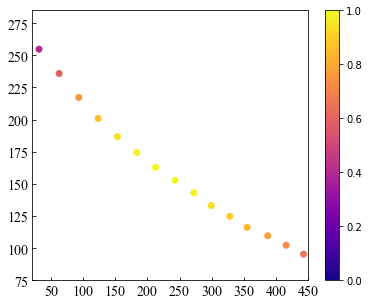

In [86]:
os.chdir(owd)
os.chdir('Figures/ragone plots')
fig = plt.figure(1)
ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
ax.tick_params(direction='in')
fig.set_size_inches((8., 5.))

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

p1 = plt.scatter(Power_cascade, -E_rec, c=Max_conc_norm, cmap='plasma', 
                 vmin=0., vmax=1.)
plt.colorbar(p1)
plt.ylim((75, 285))
plt.xlim((20, 450))
fig.savefig('Ragone_65pct25um.pdf')
os.chdir(owd)

# Ragone plot for 65% cathode porosity 10 um separator

In [87]:
Li2S8_max = 7
Li2S4_max = 2
#Li2S2_max = 0.00695
#Li2S_max = 0.0008

Li2S6_max = 6
#Li2S3_max = 0.5*(Li2S4_max + Li2S2_max)
i_ext_0 = -3.279
i_ext_25um = [i_ext_0, i_ext_0*2, i_ext_0*3, i_ext_0*4, i_ext_0*5, i_ext_0*6, i_ext_0*7, 
         i_ext_0*8, i_ext_0*9, i_ext_0*10, i_ext_0*11, i_ext_0*12, i_ext_0*13,
         i_ext_0*14, i_ext_0*15]
i_ext_0 = -3.273
i_ext_10um = [i_ext_0, i_ext_0*2, i_ext_0*3, i_ext_0*4, i_ext_0*5, i_ext_0*6, i_ext_0*7, 
         i_ext_0*8, i_ext_0*9, i_ext_0*10, i_ext_0*11, i_ext_0*12, i_ext_0*13,
         i_ext_0*14, i_ext_0*15]
Power_cascade = np.zeros((len(keys)))
E_rec = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    Vcell_cascadei = Vcell_Li_65pct10um[keys[i]]
    Cap_cascadei = Cap_Li_65pct10um[keys[i]]
    Vcell_cascade_avg = np.average(Vcell_cascadei)
    Power_cascade[i] = -Vcell_cascade_avg*i_ext_10um[i]*inputs.A_cat/an.m_bat
    E_rec[i] = -Vcell_cascade_avg*Cap_cascadei.iloc[-1]*(cat.m_S_0 + cat.m_S_el)/an.m_bat
    
print(Power_cascade, -E_rec)

[ 31.28819947  62.38588702  92.97693741 123.58789713 153.40466546
 182.99789505 212.63637316 241.14354963 270.50340938 299.17858931
 326.14578238 355.42269487 384.7972444  413.3795745  441.22031735] [254.88959478 235.3018214  217.17290086 201.87492035 187.53413448
 174.82759079 163.55415443 152.59340649 143.11484943 133.94913802
 124.58438162 116.29427538 108.12764435 100.3365385   93.35850965]


In [88]:
Max_conc = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    #print(C_k_cascade[keys[i]])
    max1 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat1'])
    max2 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat2'])
    max3 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat3'])
    max4 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat4'])
    max5 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat5'])
    max6 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat6'])
    max7 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat7'])
    max8 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat8'])
    max9 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat9'])
    max10 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat10'])
    max11 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat11'])
    max12 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat12'])
    max13 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat13'])
    max14 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat14'])
    max15 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat15'])
    max16 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat16'])
    max17 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat17'])
    max18 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat18'])
    max19 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat19'])
    max20 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat20'])
    
    Max_conc[i] = max(max1, max2, max3, max4, max5, max6, max7, max8, max9, max10,
                      max11, max12, max13, max14, max15, max16, max17, max18, max19, max20)
print(Max_conc)

Max_conc_norm = Max_conc/max(Max_conc)  #Li2S4_max
print(Max_conc_norm)

plasma_custom = matplotlib.cm.plasma(Max_conc_norm)

[0.63383935 0.94627225 1.20224581 1.38956352 1.5138454  1.58293179
 1.6056569  1.59161552 1.54984219 1.48752855 1.40866306 1.31391354
 1.20595928 1.09233244 0.97916608]
[0.39475391 0.58933652 0.74875636 0.86541746 0.94281997 0.98584685
 1.         0.99125505 0.96523871 0.92642989 0.87731262 0.8183028
 0.7510691  0.68030252 0.60982273]


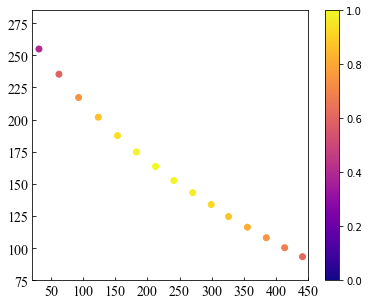

In [89]:
os.chdir(owd)
os.chdir('Figures/ragone plots')
fig = plt.figure(1)
ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
ax.tick_params(direction='in')
fig.set_size_inches((8., 5.))

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

p1 = plt.scatter(Power_cascade, -E_rec, c=Max_conc_norm, cmap='plasma', 
                 vmin=0., vmax=1.)
plt.colorbar(p1)
plt.ylim((75, 285))
plt.xlim((20, 450))
fig.savefig('Ragone_65pct10um.pdf')
os.chdir(owd)

# Archived code ----------------------------------------------------------------

In [ ]:
Power_Li = np.zeros((len(keys)))
E_rec_Li = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    Vcell_Lii = Vcell_Li[keys[i]]
    Cap_Lii = Cap_Li[keys[i]]
    Vcell_Li_avg = np.average(Vcell_Lii)
    Power_Li[i] = -Vcell_Li_avg*i_ext[i]*inputs.A_cat/an.m_bat
    E_rec_Li[i] = -Vcell_Li_avg*Cap_Lii.iloc[-1]*(cat.m_S_0 + cat.m_S_el)/an.m_bat
    
print(Power_Li, -E_rec_Li)

In [ ]:
Max_conc = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    #print(C_k_cascade[keys[i]])
    max1 = max(C_k_Li[keys[i]]['rho_Li2S2(e)_cat1'])
    max2 = max(C_k_Li[keys[i]]['rho_Li2S2(e)_cat2'])
    max3 = max(C_k_Li[keys[i]]['rho_Li2S2(e)_cat3'])
    #max4 = max(C_k_cascade[keys[i]]['rho_S2-(e)_cat4'])
    #max5 = max(C_k_cascade[keys[i]]['rho_S2-(e)_cat5'])
    Max_conc[i] = max(max1, max2, max3)
print(Max_conc)

Max_conc_norm = Max_conc/max(Max_conc)  #Li2S4_max
print(Max_conc_norm)

plasma_custom = matplotlib.cm.plasma(Max_conc_norm)

In [ ]:
os.chdir(owd)
os.chdir('Figures/ragone plots')
fig = plt.figure(1)
ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
ax.tick_params(direction='in')
fig.set_size_inches((8., 5.))

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

p1 = plt.scatter(Power_Li, -E_rec_Li, c=Max_conc, cmap='plasma', 
                 vmin=0.3, vmax=1+0.05)
#plt.colorbar(p1)
plt.ylim((75, 285))
plt.xlim((20, 450))
fig.savefig('Ragone_Li.png')
os.chdir(owd)

In [ ]:
Power_bessler = np.zeros((len(keys)))
E_rec_bessler = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    Vcell_bessleri = Vcell_bessler[keys[i]]
    Cap_bessleri = Cap_bessler[keys[i]]
    Vcell_bessler_avg = np.average(Vcell_bessleri)
    Power_bessler[i] = -Vcell_bessler_avg*i_ext[i]*inputs.A_cat/an.m_bat
    E_rec_bessler[i] = -Vcell_bessler_avg*Cap_bessleri.iloc[-1]*(cat.m_S_0 + cat.m_S_el)/an.m_bat
    
print(Power_bessler, -E_rec_bessler)

In [ ]:
Max_conc = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    #print(C_k_cascade[keys[i]])
    max1 = max(C_k_bessler[keys[i]]['rho_S2-(e)_cat1'])
    max2 = max(C_k_bessler[keys[i]]['rho_S2-(e)_cat2'])
    max3 = max(C_k_bessler[keys[i]]['rho_S2-(e)_cat3'])
    #max4 = max(C_k_cascade[keys[i]]['rho_S2-(e)_cat4'])
    #max5 = max(C_k_cascade[keys[i]]['rho_S2-(e)_cat5'])
    Max_conc[i] = max(max1, max2, max3)
print(Max_conc)

Max_conc_norm = Max_conc/max(Max_conc)  #Li2S4_max
print(Max_conc_norm)

plasma_custom = matplotlib.cm.plasma(Max_conc_norm)

In [ ]:
os.chdir(owd)
os.chdir('Figures/ragone plots')
fig = plt.figure(1)
ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
ax.tick_params(direction='in')
fig.set_size_inches((8., 5.))

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

p1 = plt.scatter(Power_bessler, -E_rec_bessler, c=Max_conc_norm, cmap='plasma', 
                 vmin=0.3, vmax=1+0.05)
#plt.colorbar(p1)
plt.ylim((75, 285))
plt.xlim((20, 450))
fig.savefig('Ragone_bessler.png')
os.chdir(owd)

## Plotting mean polysulfide concentrations (order >=4)

In [ ]:
def plot_meanPS(SV_df, tags, cycle):

#    C_k = SV_df[tags['rho_el'][cathode.i_S8:-2]].copy()
    meanPS = np.zeros([len(SV_df.index), inputs.npoints_cathode])
    for i in np.arange(inputs.npoints_cathode):
        for j in np.arange(len(SV_df.index)):
            offset = i*10
            C_k = SV_df[tags['rho_el'][5+offset:offset+8]].copy()
            meanPS[j, i] = sum(cat.n_S_atoms[5:-2]*C_k.iloc[j, :])/sum(cat.S_atoms_bool[5:-2]*C_k.iloc[j, :])
          
    "Set up your figure"
    fig = plt.figure(2)
    ax = fig.add_axes([0.2,0.2,0.6,0.75])
    fig.set_size_inches((8.,5.0))
    
    "Formatting for the figure:"
    fs = 20     #font size for plots
    lw = 2.0    #line width for plots
#    font = plt.matplotlib.font_manager.FontProperties(family='Times New Roman',size=fs-1)
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname('Times New Roman')
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname('Times New Roman')    
    
    for i in np.arange(inputs.npoints_cathode):
        p1, = plt.plot(SV_df.loc[:, 'Time'], meanPS[:, i], '-', linewidth=lw)
        plt.xlim((0, 1770))
        plt.xticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600])
        plt.yticks([2, 3, 4, 5, 6, 7, 8])
        plt.ylabel('Cell Voltage [V]', fontstyle='normal', fontname='Times new Roman', fontsize=fs+2, labelpad=5.0)
        plt.xlabel(r'Capacity $[\mathrm{Ah} \hspace{0.5} \mathrm{kg}^{-1}_{\mathrm{sulfur}}]$', fontstyle='normal', fontname='Times new Roman', fontsize=fs+2, labelpad=5.0)
        
    return